# Laplace's equation

In [1]:
# Import libraries.
from matplotlib import pyplot, cm
from mpl_toolkits import mplot3d
import numpy as np

%matplotlib inline

In [2]:
# Change default font family and size for Matplotlib figures.
pyplot.rc('font', family='serif', size=16)

## Problem setup

Solve the Laplace's equation $\nabla^2 u = 0$ in the domain $\Omega = \left[ 0, L_x \right] \times \left[ 0, L_y \right]$

<img src="figures/application_setup.png" alt="application_setup" width="300"/>

Initial guess: $u = 0$ everywhere inside the domain.

## Analytical solution

$$
u \left( x, y \right) = \frac{\sinh \left( \frac{3}{2} \pi \frac{y}{L_y} \right)}{\sinh \left( \frac{3}{2} \pi \frac{L_x}{L_y} \right)} \sin \left( \frac{3}{2} \pi \frac{x}{L_x} \right)
$$

In [3]:
def laplace_solution(x, y, Lx, Ly):
    """Return the analytical solution.

    Parameters
    ----------
    x : numpy.ndarray
        Coordinates along the x direction as a 1D array of floats.
    y : numpy.ndarray
        Coordinates along the y direction as a 1D array of floats.
    Lx : float
        Length of the domain in the x direction.
    Ly : float
        Length of the domain in the y direction.

    Returns
    -------
    u : numpy.ndarray
        The analytical solution as a 2D array of floats.

    """
    X, Y = np.meshgrid(x, y)
    u = np.sinh(3 * np.pi * Y / 2 / Ly) * np.sin(3 * np.pi * X / 2 / Lx) / np.sinh(3 * np.pi * Lx / 2 / Ly)
    return u

In [4]:
def plot_3d(x, y, u, label='$z$', elev=30.0, azim=45.0):
    """Create a 3D surface plot of the scalar field `u`.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats.
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats.
    u : numpy.ndarray
        Scalar field to plot as a 2D array of floats.
    label : string, optional
        Axis label to use in the third direction; default: 'z'.
    elev : float, optional
        Elevation angle in the z plane; default: 30.0.
    azim : float, optional
        Azimuth angle in the x,y plane; default: 45.0.

    """
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

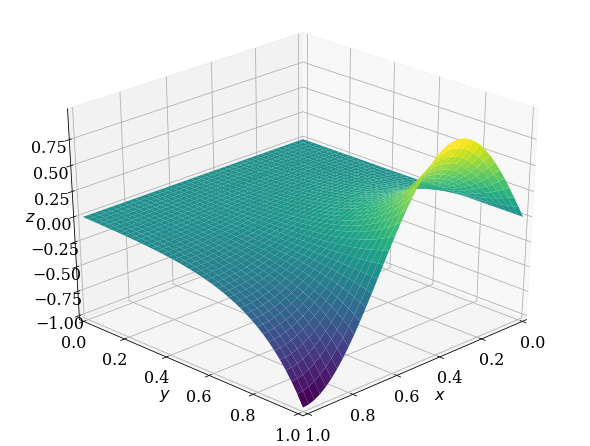

In [5]:
# Set parameters.
Lx, Ly = 1.0, 1.0  # lengths of the domain
nx, ny = 41, 41  # number of points along each direction

# Define grid-point locations.
x = np.linspace(0.0, Lx, num=nx)
y = np.linspace(0.0, Ly, num=ny)

u_analytical = laplace_solution(x, y, Lx, Ly)
plot_3d(x, y, u_analytical)


## Initial solution

<img src="figures/application_setup.png" alt="application_setup" width="300"/>

Initial guess: $u = 0$ everywhere inside the domain.

Boundary values:

* Bottom and left: $u = 0$
* Top: $u = \sin \left( \frac{3}{2} \pi \frac{x}{L_x} \right)$
* Right: $\frac{\partial u}{\partial x} = 0$

In [6]:
def init(x, y, nx, ny):
    u0 = np.zeros((ny,nx))
    X,Y = np.meshgrid(x,y)
    u0[-1, :] = np.sin(3 * np.pi * x / 2 / Lx)
    return u0

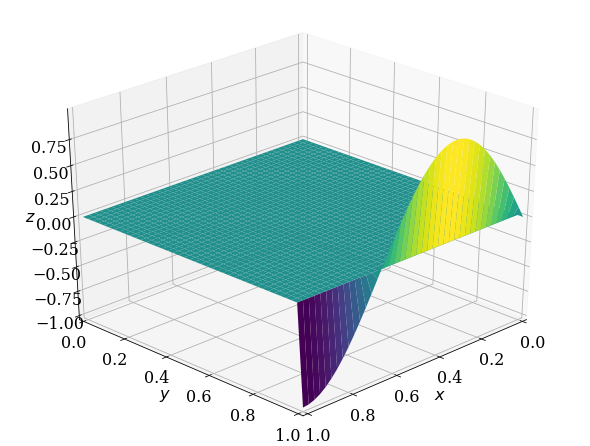

In [7]:
u0 = init(x, y, nx, ny)
plot_3d(x, y, u0)

## Jacobi method

$$
u_{i, j}^{k+1} = \frac{1}{4} \left( u_{i, j-1}^k + u_{i-1, j}^k + u_{i+1, j}^k + u_{i, j+1}^k \right)
$$

In [8]:
def laplace_2d_jacobi(u0, maxiter=20000, rtol=1e-8):
    """Solve the 2D Laplace equation using Jacobi method.

    Parameters
    ----------
    u0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform; default: 20000.
    rtol : float, optional
        Relative tolerance for convergence; default: 1e-8.

    Returns
    -------
    u : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations computed.
    diff : float
        The final relative L2-norm of the difference.

    """
    u = u0.copy()  # create copy to not overwrite initial guess
    diff = rtol + 1.0  # initialize residual to "high" value
    ite = 0  # initialize iteration index
    while diff > rtol and ite < maxiter:
        un = u.copy()  # store the solution at previous iteration
        ite += 1  # update the iteration index
        u[1:-1,1:-1] = (u[:-2,1:-1] + u[1:-1,:-2] + u[1:-1,2:] + u[2:,1:-1]) / 4
        u[1:-1,-1] = u[1:-1:,-2]
        diff = np.sqrt(np.sum((u - un)**2)) / np.sqrt(np.sum((un**2)))
        ###
        # To do: Update the solution using Jacobi method.
        # To do: Update the value at boundaries (where necessary).
        # To do: Compute `diff`, the relative L2-norm of the difference
        # in the solution between two successive iterations.
        ###

    return u, ite, diff

Iteration:  4473
Final residual 9.989253683735693e-09


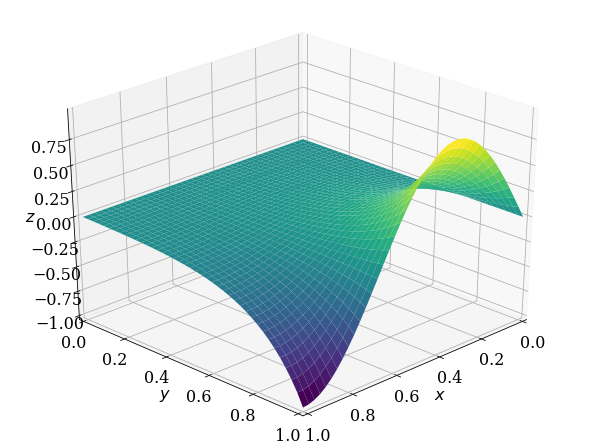

In [9]:
###
# To do: Compute the numerical solution of the Laplace equation.
# Question: How many iterations was needed?
# Question: What's the value of the final residual?
###
u, ite, diff = laplace_2d_jacobi(u0)
print('Iteration: ',ite)
print('Final residual',diff)

###
# To do: Plot the numerical solution.
###
plot_3d(x, y, u)

## Convergence analysis

In [10]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    # To do: re-set the initial guess.
    # To do: Relax the solution with Jacobi.
    # To do: Compute the analytical solution.
    # To do: Compute and append the relative L2 error to `errors`.
    ###
    n = int(Lx / dx + 1)
    x = np.linspace(0.0, Lx, num=n)
    y = np.linspace(0.0, Ly, num=n)
    u_analytical = laplace_solution(x, y, Lx, Ly)
    u0 = init(x, y, n, n)
    u, ite, diff = laplace_2d_jacobi(u0)
    error = np.sqrt(np.sum((u - u_analytical)**2)) / np.sqrt(np.sum((u_analytical**2)))
    errors.append(error)

The order of convergence is 1.0251067835946133


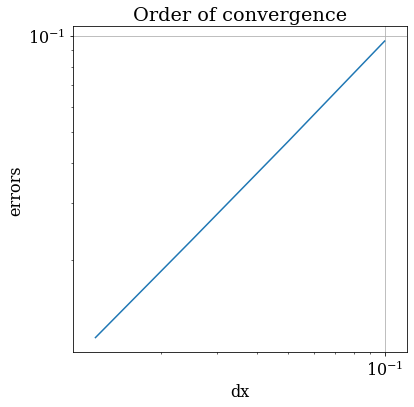

In [11]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
# Question: What's the order of convergence?
###
pyplot.figure(figsize=(6.0,6.0))
pyplot.loglog(dx_vals, errors)
pyplot.title('Order of convergence')
pyplot.xlabel('dx')
pyplot.ylabel('errors')
pyplot.grid()
pyplot.axis('equal')

a = np.polyfit(np.log(dx_vals),np.log(errors),1)
print('The order of convergence is {}'.format(a[0]))

## 2nd-order Neumann boundary conditions

In [12]:
def laplace_2d_jacobi_neumann(u0, maxiter=20000, rtol=1e-8):
    """Solve the 2D Laplace equation using Jacobi method.

    Use a second-order approximation for Neumann boundary conditions.

    Parameters
    ----------
    u0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform; default: 20000.
    rtol : float, optional
        Relative tolerance for convergence; default: 1e-8.

    Returns
    -------
    u : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.

    """
    u = u0.copy()  # create copy to not overwrite initial guess
    diff = rtol + 1.0  # initialize residual to "high" value
    ite = 0  # initialize iteration index
    while diff > rtol and ite < maxiter:
        un = u.copy()  # store the solution at previous iteration
        ite += 1  # update the iteration index
        ###
        # To do: Update the solution using Jacobi method.
        # To do: Update the value at boundaries (where necessary).
        # To do: Compute `diff`, the relative L2-norm of the difference
        # in the solution between two successive iterations.
        ###
        u[1:-1,1:-1] = (u[:-2,1:-1] + u[1:-1,:-2] + u[1:-1,2:] + u[2:,1:-1]) / 4
        u[1:-1,-1] = (u[2:,-1] + u[:-2,-1] + 2 * u[1:-1,-2]) / 4
        diff = np.sqrt(np.sum((u - un)**2)) / np.sqrt(np.sum((un**2)))
    return u, ite, diff

## Re-do convergence analysis

In [13]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    # To do: re-set the initial guess.
    # To do: Relax the solution with Jacobi.
    # To do: Compute the analytical solution.
    # To do: Compute and append the relative L2 error to `errors`.
    ###
    n = int(Lx / dx + 1)
    x = np.linspace(0.0, Lx, num=n)
    y = np.linspace(0.0, Ly, num=n)
    u_analytical = laplace_solution(x, y, Lx, Ly)
    u0 = init(x, y, n, n)
    u, ite, diff = laplace_2d_jacobi_neumann(u0)
    error = np.sqrt(np.sum((u - u_analytical)**2)) / np.sqrt(np.sum((u_analytical**2)))
    errors.append(error)

The order of convergence is 1.9011306488715114


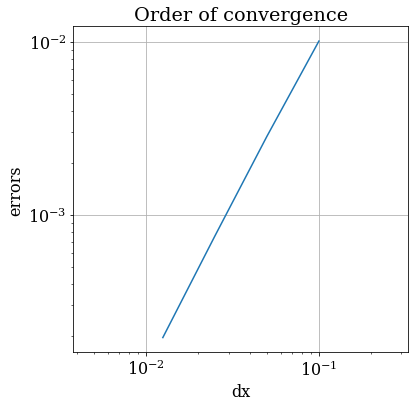

In [14]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
# Question: What's the order of convergence?
###
pyplot.figure(figsize=(6.0,6.0))
pyplot.loglog(dx_vals, errors)
pyplot.title('Order of convergence')
pyplot.xlabel('dx')
pyplot.ylabel('errors')
pyplot.grid()
pyplot.axis('equal')

a = np.polyfit(np.log(dx_vals),np.log(errors),1)
print('The order of convergence is {}'.format(a[0]))